Hierarchical Clustering involves creating clusters that have a predominant ordering from top to bottom.For example,all files and folders on the harddisk are organized in a hierarchical way.Two types of Hierarchical Clustering ->Divisive and Agglomerative

**Divisivemethod** [Top to Bottom approach]
In this method we assign all of the observations to a single cluster and then partition the cluster to two least similar clusters.Finally we proceed recursively on each cluster until there is one cluster for each observation 

**Agglomerativemethod**
In this method we assign each observation to its own cluster.Then compute the similarity (distance)between each of the clusters and join two most similar clusters.Finally repeat steps until there is only a single cluster left

There are three different methods for which linkage criteria is implemented so we understand how does distance between each of the cluster is measured.

**Singlelinkage**
In single linkage hierarchical clustering,the distance between two clusters is measured or defined as the shortest distance between two points in each cluster.
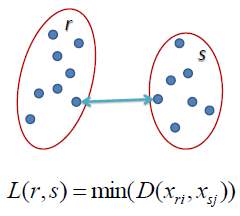

**Completelinkage**
In complete linkage hierarchical clustering,the distance between the two clusters is defined as the longest distance between the points in each cluster.
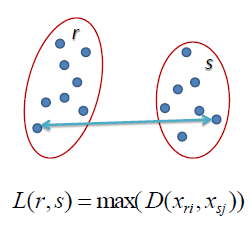

**Averagelinkage**
In average linkage hierarchical clustering,the distance between the two clusters is defined as the average distance between each point in one cluster to every point in other cluster

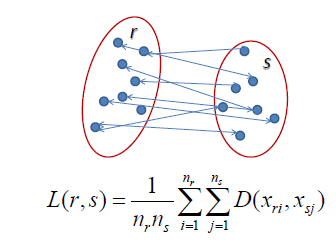

In [ ]:
#Mall Customer Dataset
#import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
a = pd.read_csv("/content/Mall_Customers.csv")
a.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#read the dataset
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#columns
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
#check information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#check the shape
df.shape

(200, 5)

In [ ]:
#To check the null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
#check description
df.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


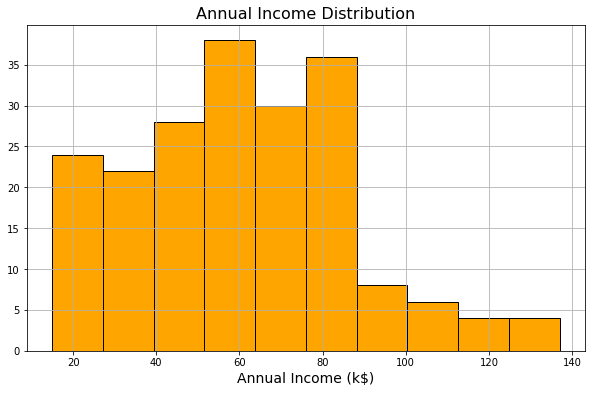

In [ ]:
#Plot the distribution of annual income
plt.figure(figsize=(10,6))
plt.title("Annual Income Distribution",fontsize=16)
plt.xlabel("Annual Income (k$)",fontsize=14)
plt.grid(True)
plt.hist(df['Annual Income (k$)'],color='orange',edgecolor = 'k')
plt.show()

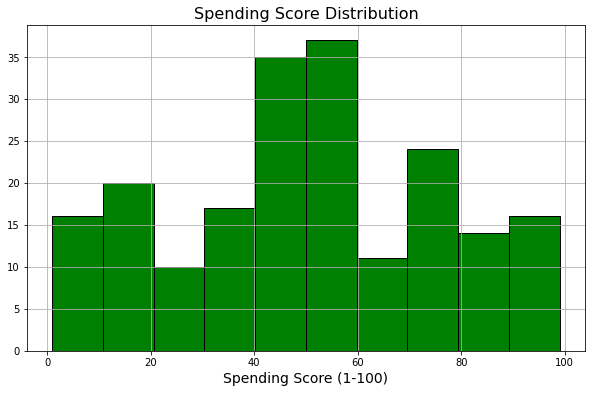

In [ ]:
#Plot the distribution of spending score
plt.figure(figsize=(10,6))
plt.title("Spending Score Distribution",fontsize=16)
plt.xlabel("Spending Score (1-100)",fontsize=14)
plt.grid(True)
plt.hist(df['Spending Score (1-100)'],color='green',edgecolor = 'k')
plt.show()

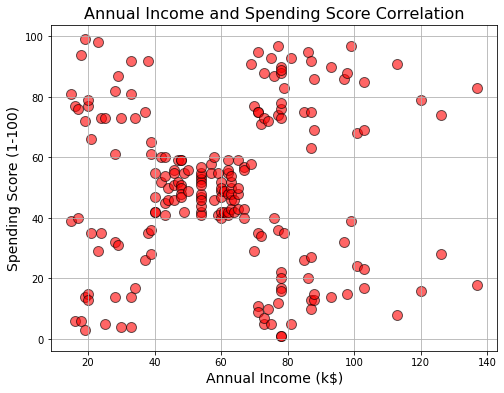

In [ ]:
#check the correlation between annual income and Spending income
plt.figure(figsize=(8,6))
plt.title("Annual Income and Spending Score Correlation",fontsize=16)
plt.xlabel("Annual Income (k$)",fontsize=14)
plt.ylabel("Spending Score (1-100)",fontsize=14)
plt.grid(True)
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],
            color = 'red',edgecolor='k',alpha=0.6,s=100)
plt.show()

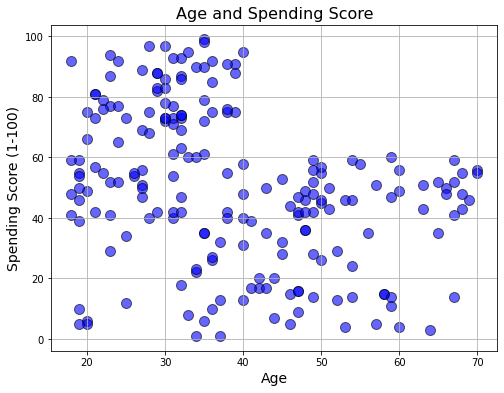

In [ ]:
#correlation between age and spending score
plt.figure(figsize=(8,6))
plt.title("Age and Spending Score",fontsize=16)
plt.xlabel("Age",fontsize=14)
plt.ylabel("Spending Score (1-100)",fontsize=14)
plt.grid(True)
plt.scatter(df['Age'],df['Spending Score (1-100)'],color = 'blue',
            edgecolor='k',alpha=0.6,s=100)
plt.show()

In [ ]:
#We just try to explore customers based on their annual income and 
#spending score to see if there are any distinguishable 
#clusters which the mall can get
#selecting the only annual income and spending score
x = df.iloc[:,[3,4]].values
#x

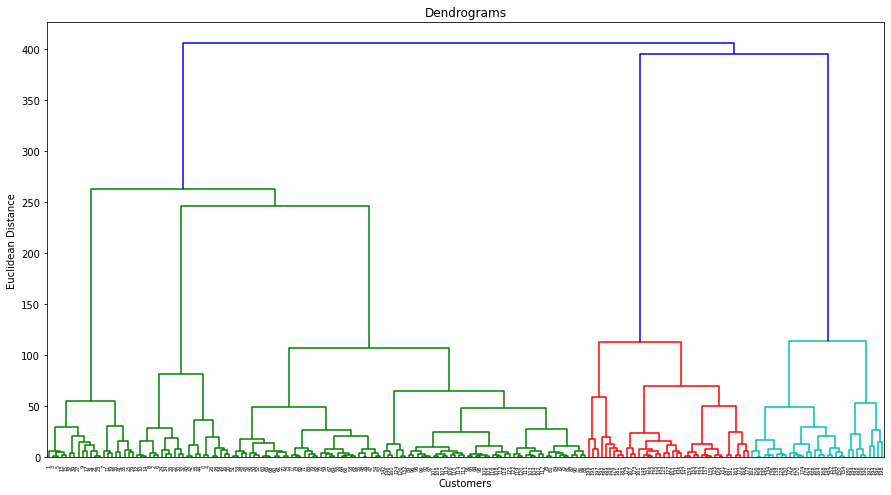

In [ ]:
#Forming Dendrograms
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,8))
plt.title("Dendrograms")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
dendrogram = sch.dendrogram(sch.linkage(x,method = 'ward'))
plt.show()

**Optimal number of Clusters**
-->Look for the longest stretch of vertical line which is not crssed by any extended horizontal lines.
-->Now take any point on that stretch line and draw an imaginary horizontal line
-->Count how many vertical lines this imaginary horizontal lines is crossing.

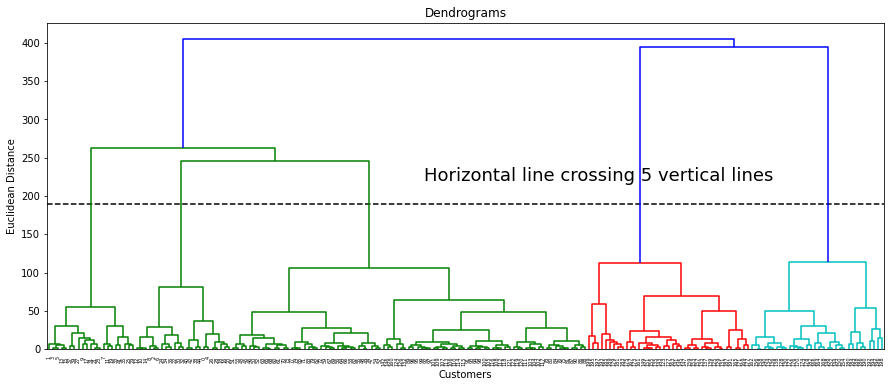

In [ ]:
plt.figure(figsize=(15,6))
plt.title("Dendrograms")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.hlines(y=190,xmin=0,xmax=2000,linestyles='--')
plt.text(x=900,y=220,s="Horizontal line crossing 5 vertical lines",
         fontsize=18)
dendrogram = sch.dendrogram(sch.linkage(x,method = 'ward'))
plt.show()

In [ ]:
#Build the model
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5,affinity = 'euclidean',
                             linkage='ward')
y_hc = hc.fit_predict(x)

Plot the clusters and label the customer types
-->Careful - high income but low spenders
-->Standard - middle income and middle spenders
-->Target group -middle-to-high income and high spenders (mall should target)
-->Careless - low income but high spenders (credit risk)
-->Sensible - low income and low spenders

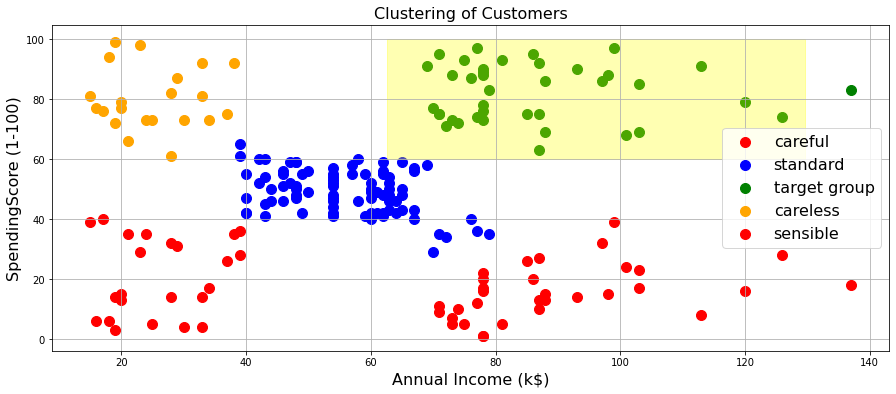

In [ ]:
plt.figure(figsize=(15,6))
plt.scatter(x[y_hc == 0,0],x[y_hc == 0,1],s=100,c='red',
            label='careful')
plt.scatter(x[y_hc == 1,0],x[y_hc == 1,1],s=100,c='blue',
            label='standard')
plt.scatter(x[y_hc == 2,0],x[y_hc == 2,1],s=100,c='green',
            label='target group')
plt.scatter(x[y_hc == 3,0],x[y_hc == 3,1],s=100,c='orange',
            label='careless')
plt.scatter(x[y_hc == 4,0],x[y_hc == 4,1],s=100,c='red',
            label='sensible')
plt.title("Clustering of Customers",fontsize=16)
plt.xlabel("Annual Income (k$)",fontsize=16)
plt.ylabel("SpendingScore (1-100)",fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.axhspan(ymin=60,ymax=100,xmin=0.4,xmax=0.9,alpha=0.3,color='yellow')
plt.show()